# Exploring flight data## by Sophia Felippe

## Preliminary Wrangling

I downloaded from the flight dataset: Jan, April, July and October 2019 (all 4 quarters of the year). 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

I imported each dataset and then merged them. I filtered the City to New York as I only wanted to focus on that. I then dropped the rows that I did not think would be relevant in my analysis.

In [2]:
flight1 = pd.read_csv('April.csv').copy()

flight2 = pd.read_csv('Jan.csv').copy()

flight3 = pd.read_csv('July.csv').copy()
flight4 = pd.read_csv('Oct.csv').copy()
flight3
flightsall = pd.concat([flight1, flight2, flight3, flight4])
nyflight = flightsall['ORIGIN_CITY_NAME'] == 'New York, NY'
flights = flightsall[nyflight]

flights.columns
# # flights = flights.drop(columns=['ARR_DELAY' , 'ARR_DELAY_GROUP', 'ARR_TIME_BLK','ARR_TIME','DIVERTED','AIR_TIME','FLIGHTS','ACTUAL_ELAPSED_TIME','FIRST_DEP_TIME','DISTANCE','ARR_DEL15','DEP_DEL15','YEAR', 'DEP_DELAY_NEW','MONTH','Unnamed: 36','ARR_DELAY_NEW'])
flights = flights.drop(columns=['DEST_AIRPORT_ID','DEST','DISTANCE','ORIGIN_CITY_NAME', 'ORIGIN','DEST_AIRPORT_SEQ_ID','DEST_CITY_MARKET_ID','FIRST_DEP_TIME' ,'Unnamed: 29','DEP_DELAY_NEW','MONTH'])
# flights.info()

flights.to_csv('flights_clean.csv', index=False)

flights = pd.read_csv('flights_clean.csv')
quarters = pd.read_csv('L_QUARTERS.csv_')


This shows that there were alot of missing fields in several rows. 

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [3]:
d = {'0001-0559':5, '0600-0659':6,'2300-2359':23,'2000-2059':20, '2100-2159':21,'1000-1059':10,'2200-2259':6, '1200-1259':12,'1800-1859':18, '1400-1459':14, '1700-1759':17, '1300-1359':13,'0800-0859':8, '0900-0959':9, '1100-1159':11, '1500-1559':15, '1600-1659':16, '1900-1959':19, '0700-0759':7}
flights = flights.replace(d)

flights['DEP_TIME_BLK'] = flights['DEP_TIME_BLK'].astype(str).astype(int)

In [4]:
e = {12953: 'Malone', 12478:'JFK'}
flights = flights.replace(e)

flights = flights.rename(columns={"ORIGIN_AIRPORT_ID": "AIRPORT"})


In [5]:
#I wanted to see the data about the columns. 
flights.info()
flights = flights.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100473 entries, 0 to 100472
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   QUARTER              100473 non-null  int64  
 1   DAY_OF_WEEK          100473 non-null  int64  
 2   FL_DATE              100473 non-null  object 
 3   OP_UNIQUE_CARRIER    100473 non-null  object 
 4   OP_CARRIER_FL_NUM    100473 non-null  int64  
 5   AIRPORT              100473 non-null  object 
 6   DEST_CITY_NAME       100473 non-null  object 
 7   CRS_DEP_TIME         100473 non-null  int64  
 8   DEP_TIME             97928 non-null   float64
 9   DEP_DELAY            97928 non-null   float64
 10  DEP_DELAY_GROUP      97928 non-null   float64
 11  DEP_TIME_BLK         100473 non-null  int64  
 12  CANCELLED            100473 non-null  float64
 13  DISTANCE_GROUP       100473 non-null  int64  
 14  CARRIER_DELAY        23070 non-null   float64
 15  WEATHER_DELAY    

This shows that the mean departure time is around 15:00. There were also no cancelled flights left in the dataset and therefore this column will be removed. The average delay is 71 minutes, when separated into different delays it can be seen that the average late aircraft delay is longer than the other delays.

In [6]:
#remove cancelled as once the rows with missing data are removed there were no cancelled flights
flights['CANCELLED'].value_counts()

flights = flights.drop(columns=['CANCELLED'])

flights.to_csv('flights_clean.csv', index=False)


### What is the structure of your dataset?

There are now 17 columns and 23070 after deleting the missing data rows and the columns that were not revelant. The data types are int,onject and float.

### What is/are the main feature(s) of interest in your dataset?

What effected the delay of flights from New York over the year of 2019?
Delay time, departure time, quarters, type of delays

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
Airports, day of week, distance of flights, airlines

## Univariate Exploration

>

I wanted to start by seeing if there is equal amounts of data from each quarter. I can see that there is a similar amount for each quarter which is a good sign.

# Types of delay

# Looking at delays in general

Firstly - looking at the dep_delay column which shows the minutes each plane was delayed. I looked at the value count first which showed that most of the planes were either on time or early by a few minutes. Bins were set to 15. There seemed to be downward trend. I then wanted to see if using the group delay column made a difference to the analysis. This showed that the most common was group 2 which is 30 mins late, followed by on time. This time there were more in the group 12 column which is 3 hours. This was a bit shocking as it did not show up in the first graph.

In [7]:
flights["DEP_DELAY"].value_counts(normalize=True)

-1.0      0.018682
 0.0      0.018682
-2.0      0.017382
-5.0      0.017295
-4.0      0.017078
            ...   
 852.0    0.000043
 570.0    0.000043
 580.0    0.000043
 733.0    0.000043
 870.0    0.000043
Name: DEP_DELAY, Length: 636, dtype: float64

Text(-9.075000000000003, 0.5, 'Count')

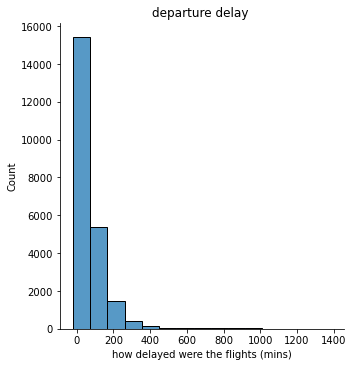

In [8]:
sb.displot(flights["DEP_DELAY"], bins=15)
plt.title('departure delay ')
plt.xlabel('how delayed were the flights (mins)')
plt.ylabel('Count')


Looking at delay groups - the definition is that group 12 is anything over 180 minutes. I wanted to look at the data. 

In [9]:
#look for outliers - look at the ones over 1000 - all look ok

more1000 = flights['DEP_DELAY']>= 1000
flights[more1000]


,QUARTER,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,AIRPORT,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_GROUP,DEP_TIME_BLK,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
11585,2,1,2019-04-15,DL,1672,JFK,"Charlotte, NC",1455,931.0,1116.0,12.0,14,3,0.0,0.0,1075.0,0.0,0.0
12083,2,5,2019-04-26,DL,1672,JFK,"Charlotte, NC",1455,803.0,1028.0,12.0,14,3,1024.0,0.0,0.0,0.0,0.0
14020,2,5,2019-04-26,9E,5366,JFK,"Washington, DC",1336,644.0,1028.0,12.0,13,1,0.0,1002.0,12.0,0.0,12.0
15129,2,5,2019-04-19,DL,2919,JFK,"San Antonio, TX",1905,1222.0,1037.0,12.0,19,7,1010.0,0.0,0.0,0.0,0.0
27297,1,7,2019-01-20,AA,631,JFK,"Charlotte, NC",1925,1832.0,1387.0,12.0,19,3,1358.0,0.0,20.0,0.0,29.0
36067,1,1,2019-01-21,YV,6053,Malone,"Washington, DC",1445,837.0,1072.0,12.0,14,1,1071.0,0.0,0.0,0.0,0.0
44322,1,1,2019-01-21,DL,1936,Malone,"Boston, MA",1900,1246.0,1066.0,12.0,19,1,0.0,1051.0,0.0,0.0,0.0
52007,3,6,2019-07-06,9E,3307,Malone,"Greer, SC",1425,757.0,1052.0,12.0,14,3,919.0,0.0,0.0,0.0,116.0
52208,3,6,2019-07-06,9E,3328,Malone,"Madison, WI",1510,849.0,1059.0,12.0,15,4,0.0,0.0,902.0,0.0,147.0
55432,3,6,2019-07-06,YV,6339,Malone,"Houston, TX",1545,1251.0,1266.0,12.0,15,6,0.0,0.0,0.0,0.0,1229.0


In [10]:

flights["DEP_DELAY_GROUP"].value_counts(normalize=True)

 2.0     0.131209
-1.0     0.129692
 0.0     0.111617
 1.0     0.111357
 3.0     0.105678
 4.0     0.084005
 12.0    0.083615
 5.0     0.064066
 6.0     0.048331
 7.0     0.037451
 8.0     0.029692
 9.0     0.025184
 10.0    0.019332
 11.0    0.018596
-2.0     0.000173
Name: DEP_DELAY_GROUP, dtype: float64

Text(0, 0.5, 'Count')

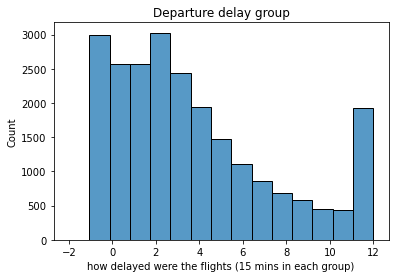

In [11]:
sb.histplot(x=flights["DEP_DELAY_GROUP"], bins=15)
plt.title('Departure delay group')
plt.xlabel('how delayed were the flights (15 mins in each group)')
plt.ylabel('Count')

In [12]:
flights["DEP_DELAY_GROUP"].value_counts().sort_values(ascending=False)

 2.0     3027
-1.0     2992
 0.0     2575
 1.0     2569
 3.0     2438
 4.0     1938
 12.0    1929
 5.0     1478
 6.0     1115
 7.0      864
 8.0      685
 9.0      581
 10.0     446
 11.0     429
-2.0        4
Name: DEP_DELAY_GROUP, dtype: int64

# Carrier delay

I started by looking at the value counts. The most flights (54%) had no delay. I started with a standard histogram and then wanted to explore the trend more. It shows that the most flights were not delayed or not by long.

In [13]:
flights['CARRIER_DELAY'].value_counts(normalize=True)


0.0      0.549848
2.0      0.018466
1.0      0.017035
3.0      0.015778
6.0      0.015648
           ...   
376.0    0.000043
591.0    0.000043
703.0    0.000043
313.0    0.000043
883.0    0.000043
Name: CARRIER_DELAY, Length: 419, dtype: float64

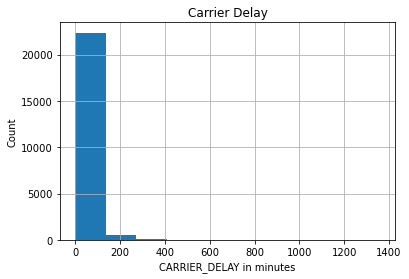

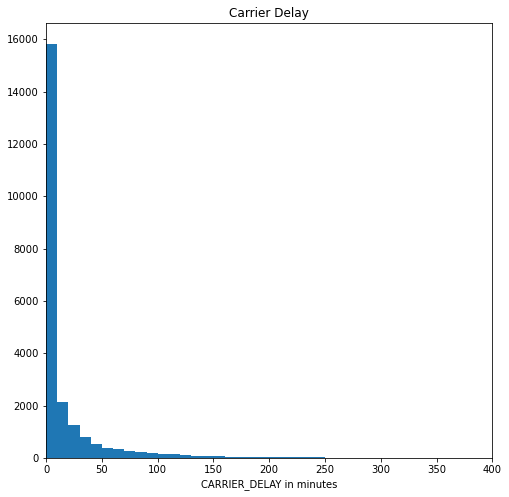

In [14]:
#Standard histogram
flights['CARRIER_DELAY'].hist()
plt.xlabel('CARRIER_DELAY in minutes')
plt.ylabel('Count')
plt.title('Carrier Delay')

#explore further
binsize = 10
bins = np.arange(0, flights['CARRIER_DELAY'].max()+binsize, binsize)
plt.figure(figsize=[8, 8])
plt.hist(data = flights, x = 'CARRIER_DELAY', bins = bins)
plt.xlim([0,400])
plt.xlabel('CARRIER_DELAY in minutes')
plt.title('Carrier Delay')
plt.show()


# Weather delay

The value count shows that 96% of the flights were not delayed due to weather.

In [15]:
flights['WEATHER_DELAY'].value_counts(normalize=True)

0.0      0.960121
1.0      0.001560
15.0     0.001170
6.0      0.000997
4.0      0.000997
           ...   
234.0    0.000043
664.0    0.000043
221.0    0.000043
849.0    0.000043
107.0    0.000043
Name: WEATHER_DELAY, Length: 262, dtype: float64

Text(0.5, 0, 'WEATHER DELAY in minutes')

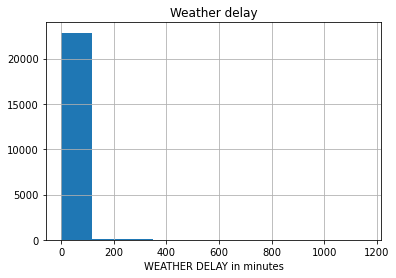

In [16]:
#standard hist
flights['WEATHER_DELAY'].hist()
plt.title('Weather delay')
plt.xlabel('WEATHER DELAY in minutes')



# NAS DELAY -
National Aviation System (NAS): Delays and cancellations attributable to the national aviation system that refer to a broad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control. (https://www.bts.gov/topics/airlines-and-airports/understanding-reporting-causes-flight-delays-and-cancellations)

This shows that 41% of the flights had no NAS delay. 

In [17]:
flights['NAS_DELAY'].value_counts(normalize=True)

0.0      0.413221
15.0     0.020850
16.0     0.020113
17.0     0.018596
19.0     0.017989
           ...   
649.0    0.000043
265.0    0.000043
177.0    0.000043
211.0    0.000043
167.0    0.000043
Name: NAS_DELAY, Length: 361, dtype: float64

Text(0.5, 0, 'NAS delay in minutes')

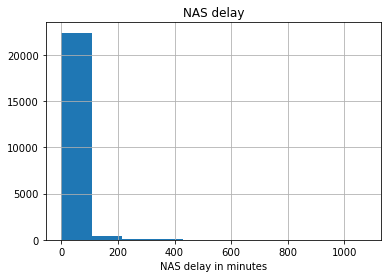

In [18]:
#standard hist
flights['NAS_DELAY'].hist()
plt.title('NAS delay')
plt.xlabel('NAS delay in minutes')

# Security delay

Shows 99.8% are not delayed due to security

In [19]:
flights['SECURITY_DELAY'].value_counts(normalize=True)

0.0      0.998093
15.0     0.000130
21.0     0.000130
57.0     0.000087
4.0      0.000087
19.0     0.000087
13.0     0.000087
24.0     0.000087
9.0      0.000087
30.0     0.000087
7.0      0.000087
48.0     0.000043
16.0     0.000043
8.0      0.000043
12.0     0.000043
3.0      0.000043
1.0      0.000043
6.0      0.000043
32.0     0.000043
35.0     0.000043
25.0     0.000043
136.0    0.000043
31.0     0.000043
78.0     0.000043
5.0      0.000043
56.0     0.000043
10.0     0.000043
11.0     0.000043
14.0     0.000043
816.0    0.000043
54.0     0.000043
52.0     0.000043
22.0     0.000043
Name: SECURITY_DELAY, dtype: float64

Text(0.5, 0, 'SECURITY DELAY in minutes')

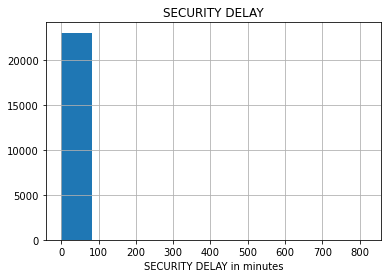

In [20]:
flights['SECURITY_DELAY'].hist()
plt.title('SECURITY DELAY')
plt.xlabel('SECURITY DELAY in minutes')

# Late aircraft delay

This shows that 43% of the flights were not delayed due to late aircraft

In [21]:
flights['LATE_AIRCRAFT_DELAY'].value_counts(normalize=True)

0.0      0.432943
15.0     0.010273
18.0     0.010056
17.0     0.009796
20.0     0.009580
           ...   
441.0    0.000043
282.0    0.000043
397.0    0.000043
464.0    0.000043
263.0    0.000043
Name: LATE_AIRCRAFT_DELAY, Length: 368, dtype: float64

23
       QUARTER  DAY_OF_WEEK     FL_DATE OP_UNIQUE_CARRIER  OP_CARRIER_FL_NUM  \
1023         2            1  2019-04-15                NK                331   
1629         2            5  2019-04-26                AA               1056   
3669         2            1  2019-04-15                9E               5150   
14355        2            5  2019-04-26                9E               5421   
14374        2            1  2019-04-15                9E               5422   
16698        2            5  2019-04-26                B6               1218   
17324        2            1  2019-04-08                AA               1530   
21758        2            1  2019-04-15                DL               2952   
23039        2            5  2019-04-19                B6               2501   
50075        3            6  2019-07-06                B6                118   
51063        3            4  2019-07-18                UA               1213   
54979        3            5  2019-07-

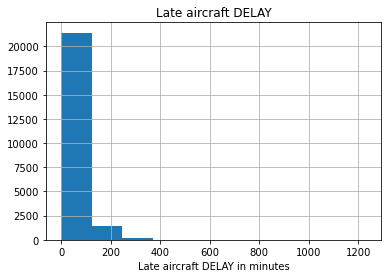

In [22]:
flights['LATE_AIRCRAFT_DELAY'].hist()
plt.title('Late aircraft DELAY')
plt.xlabel('Late aircraft DELAY in minutes')

#remove outliers
high_outliers = ((flights['LATE_AIRCRAFT_DELAY'] > 400))
print(high_outliers.sum())
print(flights.loc[high_outliers,:])

# Flight departure time

I firstly looked at CRS dep time which is the time the flights were meant to take off, then I looked at the time they actually took off. This shows that the amount of flights taking off increased throughout the day. I plotted the original departure time blocks to see if this made a difference. There was a similar trend. Flights seemed to actually take off in the early morning whilst they were not originally scheduled to. 

In [23]:
flights["CRS_DEP_TIME"].describe()

count    23070.000000
mean      1530.923017
std        435.428945
min        500.000000
25%       1205.000000
50%       1602.500000
75%       1900.000000
max       2359.000000
Name: CRS_DEP_TIME, dtype: float64

Series([], dtype: int64)
Series([], dtype: int64)


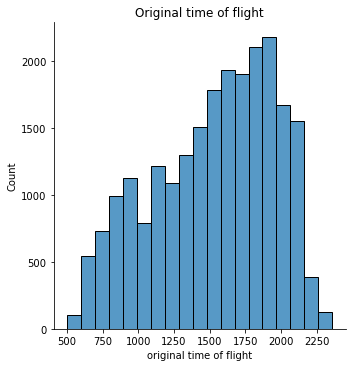

In [24]:
#time flights should take off

sb.displot(flights["CRS_DEP_TIME"], bins=19)
plt.title('Original time of flight')
plt.xlabel('original time of flight')
plt.ylabel('Count')
;

#check if any of the flight data is wrong by checking the flights are within the clock.
aq = flights["CRS_DEP_TIME"] > 2400
print(flights[aq].value_counts())

aa = flights["CRS_DEP_TIME"] < 0000
print(flights[aa].value_counts())


In [25]:
flights['DEP_TIME'].value_counts(normalize=True)
flights['DEP_TIME'].describe()

count    23070.000000
mean      1569.402254
std        512.599107
min          1.000000
25%       1221.000000
50%       1650.000000
75%       1956.000000
max       2400.000000
Name: DEP_TIME, dtype: float64

Series([], dtype: int64)
Series([], dtype: int64)


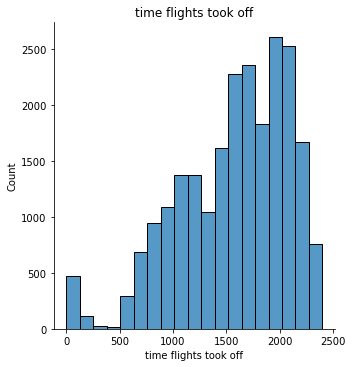

In [26]:
# flights['DEP_TIME'].hist(bins=24)
# plt.title('Departure time ')
# plt.xlabel('Departure time (HH:MM)');


sb.displot(flights["DEP_TIME"], bins=19)
plt.title('time flights took off')
plt.xlabel('time flights took off')
plt.ylabel('Count')
;

#check if any of the flight data is wrong by checking the flights are within the clock.
az = flights["DEP_TIME"] > 2400
print(flights[az].value_counts())

ac = flights["DEP_TIME"] < 0000
print(flights[ac].value_counts())


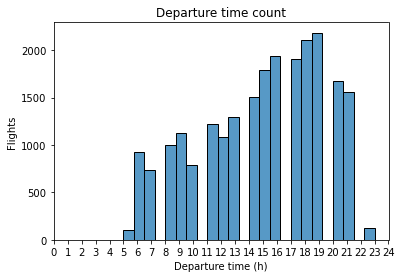

In [27]:
#dep time block of when flights should take off value counts - whole year

sb.histplot(flights["DEP_TIME_BLK"], bins=24)
plt.title('Departure time count')
plt.xlabel('Departure time (h)')
plt.ylabel('Flights')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13,14,15,16,17,18,19,20,21,22,23, 24,]);

# Quarters of the year compared

I wanted to see if there were the same amount of flights in each quarter. This shows that there was not much difference throughout the year.

Text(0, 0.5, 'Amount of data')

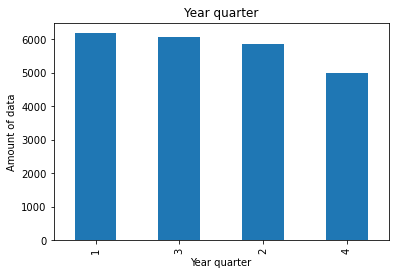

In [28]:
#compare quarters - how many
p1= flights['QUARTER'].value_counts().plot.bar()
plt.title('Year quarter')
plt.xlabel('Year quarter')
plt.ylabel('Amount of data')



# Airlines

DL had the most flights. 

In [29]:
flights['OP_UNIQUE_CARRIER'].value_counts(normalize=True)

DL    0.188557
9E    0.151625
B6    0.149848
YX    0.123927
AA    0.112007
MQ    0.069831
OO    0.067187
WN    0.047984
UA    0.028999
NK    0.014824
AS    0.014174
OH    0.011573
YV    0.006502
EV    0.005895
F9    0.005678
HA    0.001387
Name: OP_UNIQUE_CARRIER, dtype: float64

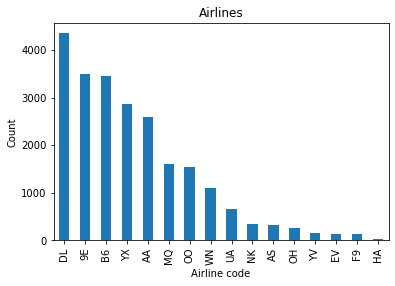

In [30]:
flights['OP_UNIQUE_CARRIER'].value_counts().plot.bar()
plt.title('Airlines')
plt.xlabel('Airline code')
plt.ylabel('Count');

# Flight distance

40% of the flights were either 500 or 750 miles long.

In [31]:
flights['DISTANCE_GROUP'].value_counts(normalize=True)

3     0.214304
2     0.194668
5     0.137278
4     0.129085
1     0.127482
6     0.057607
10    0.051062
7     0.040139
11    0.026571
9     0.015215
8     0.006589
Name: DISTANCE_GROUP, dtype: float64

Text(0.5, 0, 'Flight group (each unit 250 miles)')

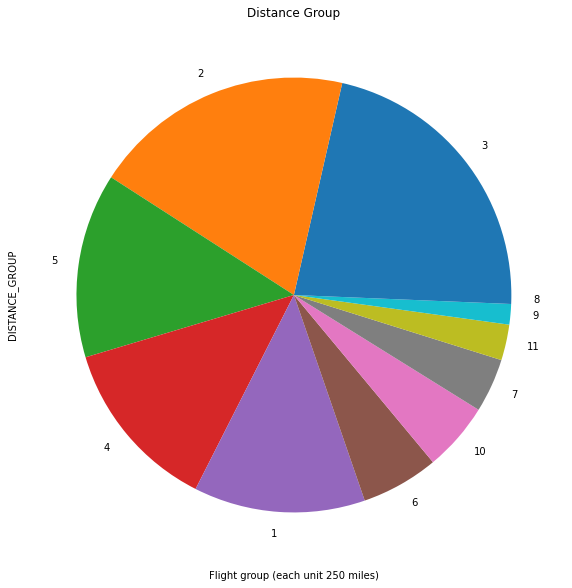

In [32]:
plt.figure(figsize=(20,10))
flights['DISTANCE_GROUP'].value_counts(normalize=True).plot.pie()
plt.title('Distance Group')
plt.xlabel('Flight group (each unit 250 miles)')

Chicago is the most popular destination to fly to.

# Days of the week

Friday is the most popular day to fly

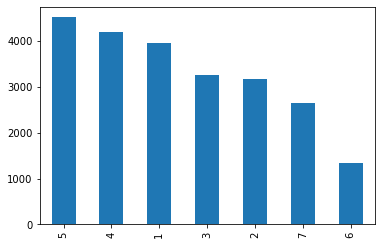

In [33]:
flights['DAY_OF_WEEK'].value_counts().plot.bar();

# Origin airport 

In [34]:
flights['AIRPORT'].value_counts(normalize=True)

Malone    0.648765
JFK       0.351235
Name: AIRPORT, dtype: float64

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Most of the flights were either not delayed or early, late aircraft seems to be the most common delay reason. There are 2 airports in New York, 6 airlines. The amount of flights increased throughout the day with the most being around 7pm and then decreasing. The most flights flew out on a Friday. There were less flights in the 4th quarter. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I deleted the cancelled column due to once I removed the rows with missing data, there were no flights that had been cancelled. I changed the values column dep_time_blk to integers and not ranges to make it easier to assess the data. I changed the aiport code column to the airport name to make it more readable.

I wanted to start by seeing the correlation between DEP_DELAY and the other columns to see what effects the delay. This shows that the most correlated is the late aircraft delay. Then I looked at all of the columns correlated to eachother. This also shows that departure time group and delay time group are correlated too. NAS, weather and carrier delay also correlates to delay time. Late aircraft delay correlates to departure time. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [35]:
flights.corr()['DEP_DELAY']

QUARTER               -0.000297
DAY_OF_WEEK            0.008065
OP_CARRIER_FL_NUM     -0.016606
CRS_DEP_TIME           0.132186
DEP_TIME               0.007410
DEP_DELAY              1.000000
DEP_DELAY_GROUP        0.808328
DEP_TIME_BLK           0.125175
DISTANCE_GROUP        -0.011383
CARRIER_DELAY          0.579618
WEATHER_DELAY          0.295616
NAS_DELAY              0.298856
SECURITY_DELAY         0.051812
LATE_AIRCRAFT_DELAY    0.519734
Name: DEP_DELAY, dtype: float64

<AxesSubplot:>

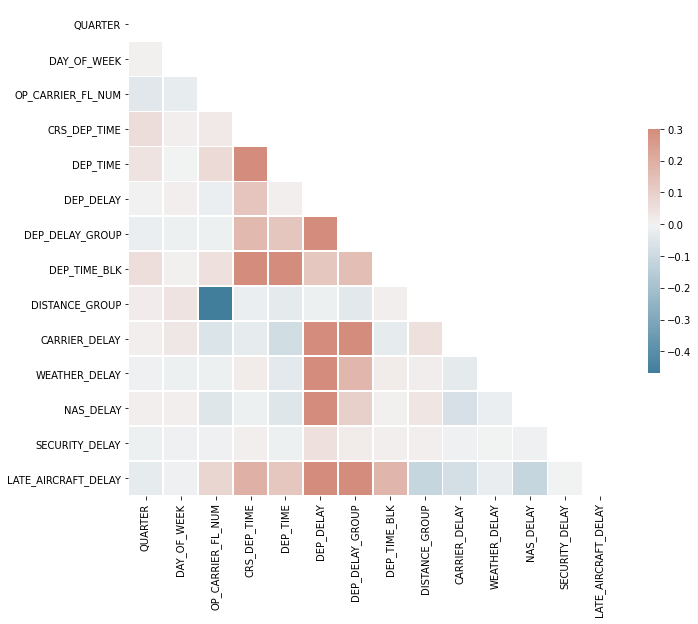

In [36]:
corr = flights.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sb.diverging_palette(230, 20, as_cmap=True)
sb.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# DEPARTURE DELAY VS OTHERS

In [37]:
# ed = flights['DISTANCE_GROUP'] == 4
# ax = flights[ed]         
# ax.describe()             
# bob = (flights['DEP_DELAY_GROUP'] != 12)
# ax[bob]

# ax['DEP_DELAY_GROUP'].value_counts()

# Q1 = ax.quantile(0.25)
# Q3 = ax.quantile(0.75)
# IQR = Q3 - Q1 
# filter = (ax >= Q1 - 1.5 * IQR) & (ax <= Q3 + 1.5 *IQR)
# filter

# fg = flights['AIRPORT'] == 'Malone'
# sds[fg].sort_values(by='DEP_TIME')

# dd = flights['OP_UNIQUE_CARRIER'] = 'B6'

# ss[dd]
# flights[sd]

# bb = flights['DEP_TIME']<100
# flights[bb]


# ax.describe()
# pltsize = (10,10)
# flights.plot.scatter(x=, y='DEP_DELAY_GROUP')
# (y=ed, x ='DEP_DELAY_GROUP' ,data=flights)


# flights['DEP_TIME'].describe()


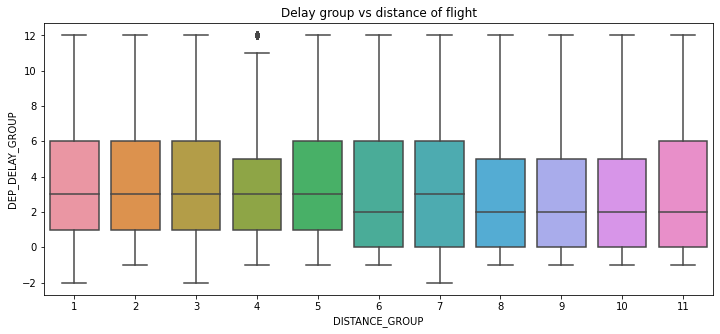

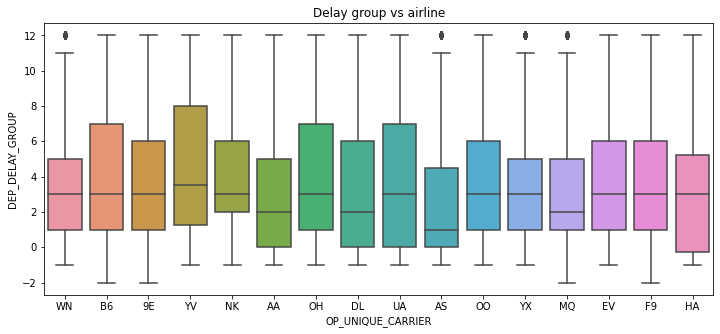

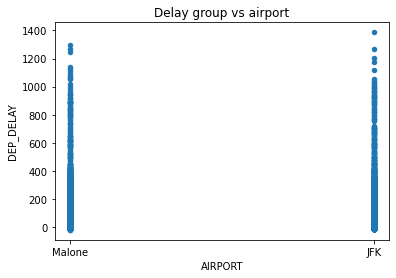

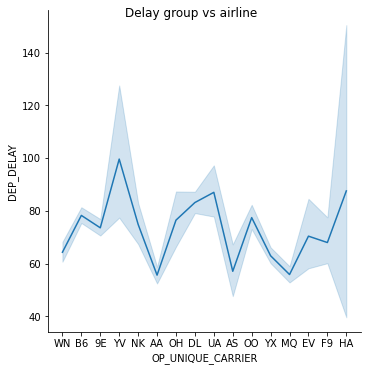

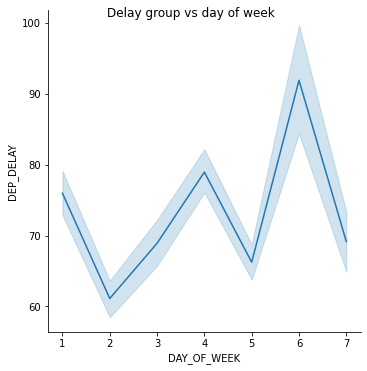

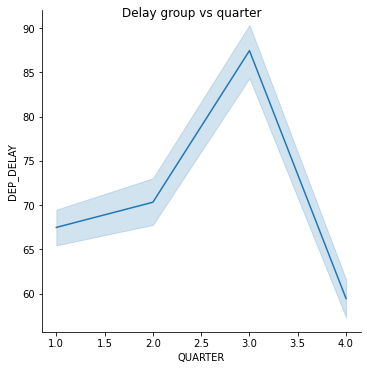

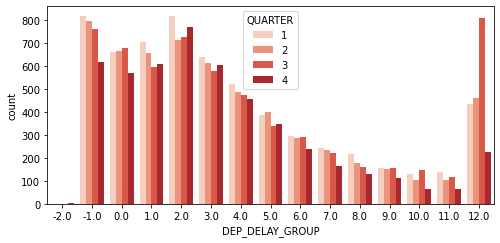

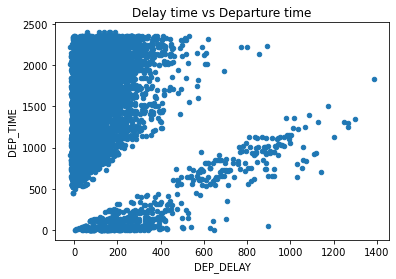

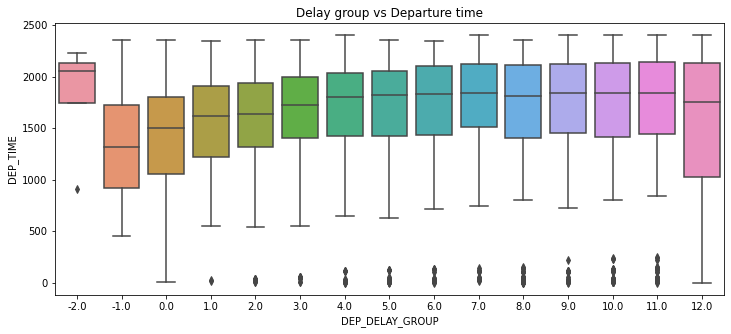

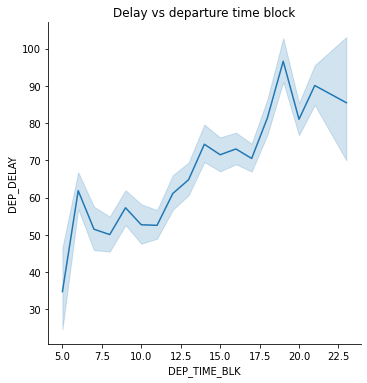

In [38]:
plt.figure(figsize=(12,5))
sb.boxplot(y = "DEP_DELAY_GROUP", x ='DISTANCE_GROUP' ,data=flights).set_title("Delay group vs distance of flight");


plt.figure(figsize=(12,5))

sb.boxplot(y = "DEP_DELAY_GROUP", x ='OP_UNIQUE_CARRIER' ,data=flights).set_title("Delay group vs airline");


flights.plot.scatter(x='AIRPORT', y='DEP_DELAY').set_title("Delay group vs airport")
;


ax =sb.relplot(x='OP_UNIQUE_CARRIER', y='DEP_DELAY',kind="line", data=flights)
ax.fig.suptitle("Delay group vs airline");

az = sb.relplot(x='DAY_OF_WEEK', y='DEP_DELAY',kind="line", data=flights)
az.fig.suptitle("Delay group vs day of week");


aa = sb.relplot(x='QUARTER', y='DEP_DELAY',kind="line", data=flights)
aa.fig.suptitle("Delay group vs quarter");

x = flights['DEP_DELAY_GROUP']
y = flights['QUARTER']
plt.figure(figsize = [8, 8])
plt.title('Delay group vs quarter')
plt.subplot(2,1,1)
sb.countplot(data = flights, x = x, hue = y, palette = 'Reds')
plt.show();

flights.plot.scatter(y='DEP_TIME', x='DEP_DELAY')

plt.title('Delay time vs Departure time');
plt.figure(figsize=(12,5))
plt.title('Delay group vs Departure time')
sb.boxplot(y = "DEP_TIME", x ='DEP_DELAY_GROUP' ,data=flights);

sb.relplot(x='DEP_TIME_BLK', y='DEP_DELAY',kind="line", data=flights)
plt.title('Delay vs departure time block');


Delay time vs other factors - these graphs show that distance of the flight doesn't really make a difference to the delay time as the median for all is 2 or 3 groups which is 30 or 45 mins late. Distance group 4 has an outlier at group 12 for delay. Airlines - YV and HA seem to have to most delays. The 3rd quarter had more delays than the others, having several flights in group 12 of delay. Delays seemed to be less common in the morning and increased into the evening, thus having a positive correlation. I looked at the outliers and they seem to be correct so I will not remove them. There were more delays on Saturdays and less on Tuesdays. Airports show similar trendds of delay.

In [39]:

#look for outliers as shown on the boxplot
grp1 = (flights['DEP_TIME'] < 500) & (flights['DEP_DELAY_GROUP']==1)
flights[grp1]

grp2 = (flights['DEP_TIME'] < 500) & (flights['DEP_DELAY_GROUP']==2)
flights[grp2]

grp3 = (flights['DEP_TIME'] < 500) & (flights['DEP_DELAY_GROUP']==3)
flights[grp3]





,QUARTER,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,AIRPORT,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_GROUP,DEP_TIME_BLK,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
16443,2,3,2019-04-24,B6,1503,JFK,"San Juan, PR",2350,36.0,46.0,3.0,23,7,23.0,0.0,0.0,0.0,0.0
23250,2,6,2019-04-06,B6,839,JFK,"Aguadilla, PR",2359,50.0,51.0,3.0,23,7,16.0,0.0,0.0,0.0,26.0
26517,1,1,2019-01-21,B6,839,JFK,"Aguadilla, PR",2359,47.0,48.0,3.0,23,7,5.0,0.0,0.0,0.0,21.0
34404,1,7,2019-01-27,B6,839,JFK,"Aguadilla, PR",2359,53.0,54.0,3.0,23,7,8.0,0.0,0.0,0.0,39.0
34771,1,3,2019-01-30,B6,839,JFK,"Aguadilla, PR",2359,52.0,53.0,3.0,23,7,23.0,0.0,0.0,0.0,28.0
34920,1,2,2019-01-01,B6,1503,JFK,"San Juan, PR",2359,55.0,56.0,3.0,23,7,14.0,0.0,0.0,0.0,18.0
50318,3,7,2019-07-07,B6,2002,JFK,"Buffalo, NY",2311,5.0,54.0,3.0,23,2,7.0,0.0,0.0,0.0,37.0
59393,3,2,2019-07-23,B6,839,JFK,"Aguadilla, PR",2355,52.0,57.0,3.0,23,7,12.0,0.0,10.0,0.0,45.0
63730,3,3,2019-07-03,B6,839,JFK,"Aguadilla, PR",2354,45.0,51.0,3.0,23,7,14.0,0.0,0.0,0.0,19.0
96706,4,3,2019-10-23,B6,1218,JFK,"Boston, MA",2305,2.0,57.0,3.0,23,1,6.0,0.0,0.0,0.0,36.0


# Departure time vs others

In [40]:
# qq = flights["CRS_DEP_TIME"] <= 1000
# flights[qq]

grp1 = (flights["CRS_DEP_TIME"] <= 1000) & (flights['DEP_TIME']<500)
flights[grp1]

,QUARTER,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,AIRPORT,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_GROUP,DEP_TIME_BLK,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
6335,2,3,2019-04-10,B6,1403,JFK,"San Juan, PR",500,454.0,-6.0,-1.0,5,7,0.0,0.0,22.0,0.0,0.0
16179,2,1,2019-04-22,B6,1403,JFK,"San Juan, PR",500,455.0,-5.0,-1.0,5,7,0.0,0.0,20.0,0.0,0.0
53295,3,7,2019-07-14,HA,51,JFK,"Honolulu, HI",1000,54.0,894.0,12.0,10,11,863.0,0.0,0.0,0.0,0.0
78595,4,1,2019-10-28,B6,1403,JFK,"San Juan, PR",501,456.0,-5.0,-1.0,5,7,0.0,0.0,16.0,0.0,0.0


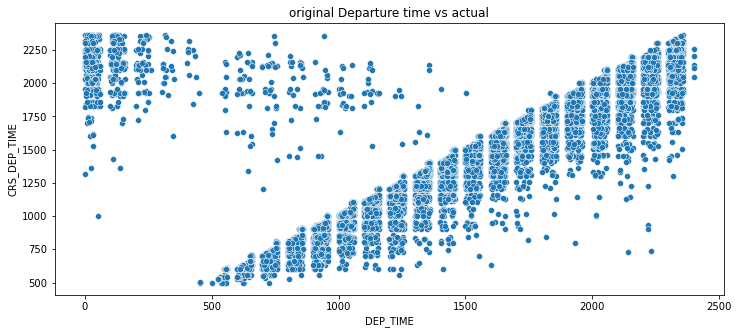

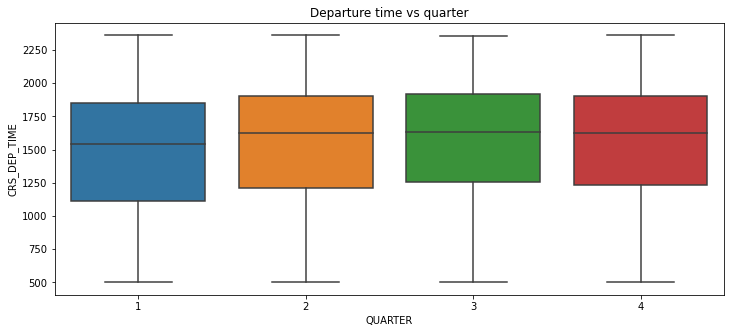

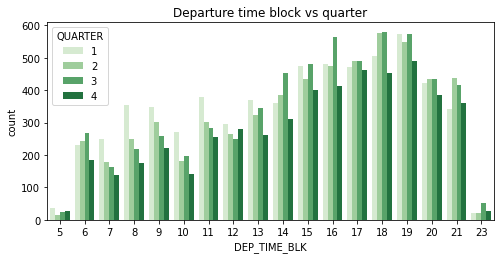

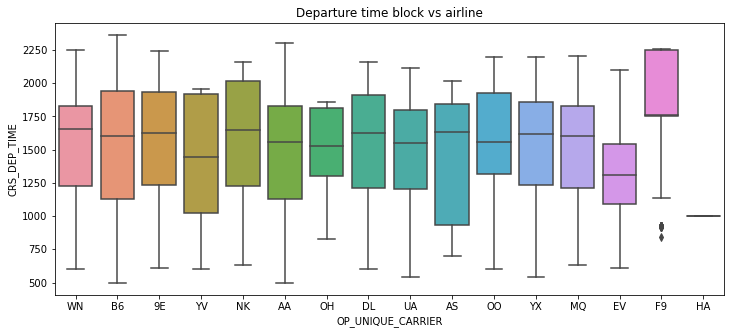

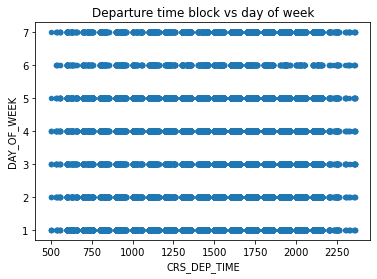

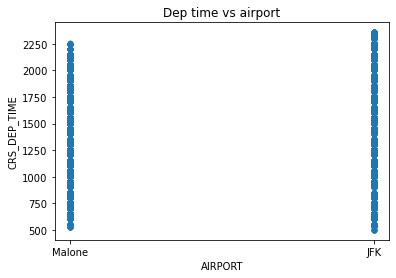

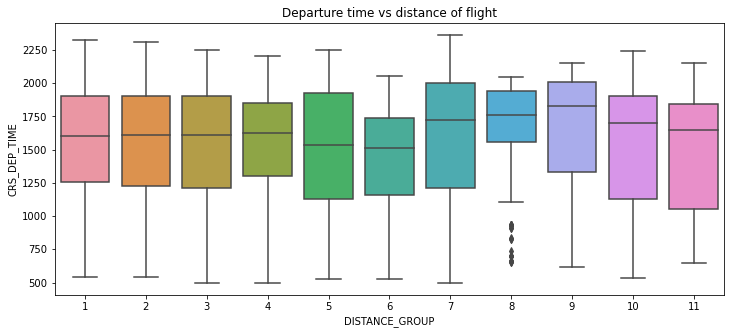

In [41]:
plt.figure(figsize=(12,5))
plt.title('original Departure time vs actual')
sb.scatterplot(y = "CRS_DEP_TIME", x ='DEP_TIME' ,data=flights);

#quarter vs departure delay
plt.figure(figsize=(12,5))
plt.title('Departure time vs quarter')
sb.boxplot(y = "CRS_DEP_TIME", x ='QUARTER' ,data=flights);

x = flights['DEP_TIME_BLK']
y = flights['QUARTER']
plt.figure(figsize = [8, 8])
plt.subplot(2,1,1)
plt.title('Departure time block vs quarter')
sb.countplot(data = flights, x = x, hue = y, palette = 'Greens')
plt.show();

plt.figure(figsize=(12,5))
plt.title('Departure time block vs airline')
sb.boxplot(y = "CRS_DEP_TIME", x ='OP_UNIQUE_CARRIER' ,data=flights)

flights.plot.scatter(x='CRS_DEP_TIME', y='DAY_OF_WEEK')
plt.title('Departure time block vs day of week');

flights.plot.scatter(x='AIRPORT', y='CRS_DEP_TIME')
plt.title('Dep time vs airport');

plt.figure(figsize=(12,5))
plt.title('Departure time vs distance of flight')
sb.boxplot(y = "CRS_DEP_TIME", x ='DISTANCE_GROUP' ,data=flights);

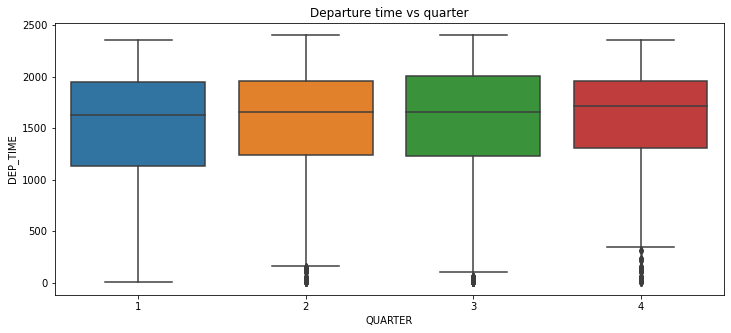

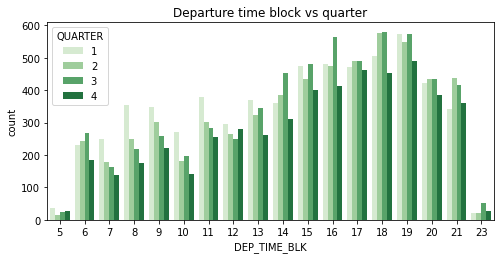

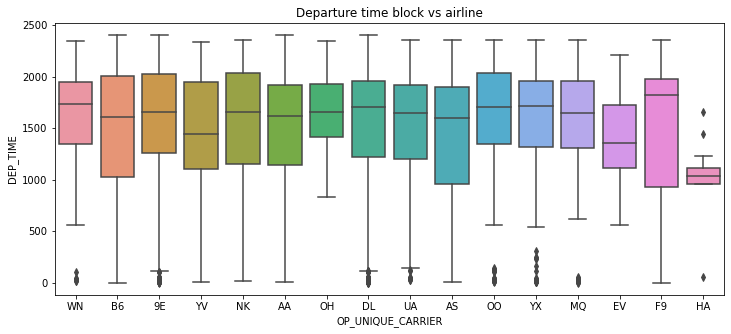

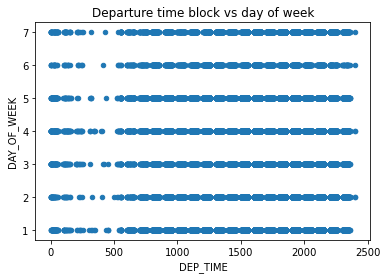

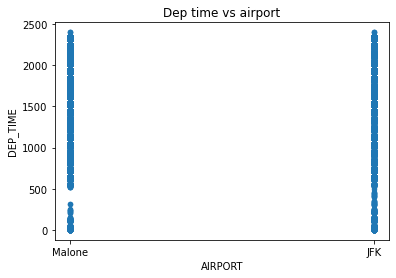

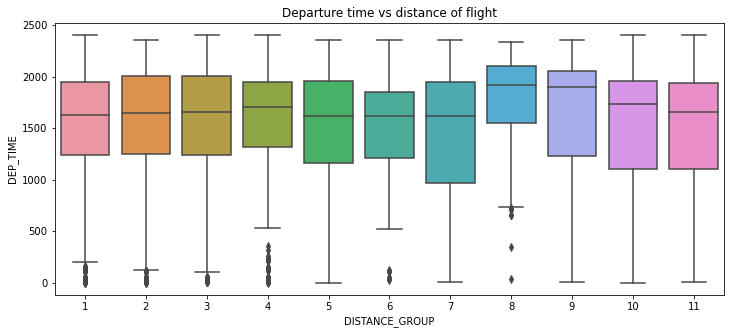

In [42]:
#quarter vs departure delay
plt.figure(figsize=(12,5))
plt.title('Departure time vs quarter')
sb.boxplot(y = "DEP_TIME", x ='QUARTER' ,data=flights);

x = flights['DEP_TIME_BLK']
y = flights['QUARTER']
plt.figure(figsize = [8, 8])
plt.subplot(2,1,1)
plt.title('Departure time block vs quarter')
sb.countplot(data = flights, x = x, hue = y, palette = 'Greens')
plt.show();

plt.figure(figsize=(12,5))
plt.title('Departure time block vs airline')
sb.boxplot(y = "DEP_TIME", x ='OP_UNIQUE_CARRIER' ,data=flights)

flights.plot.scatter(x='DEP_TIME', y='DAY_OF_WEEK')
plt.title('Departure time block vs day of week');

flights.plot.scatter(x='AIRPORT', y='DEP_TIME')
plt.title('Dep time vs airport');

plt.figure(figsize=(12,5))
plt.title('Departure time vs distance of flight')
sb.boxplot(y = "DEP_TIME", x ='DISTANCE_GROUP' ,data=flights);


These show that the departure time trend is similar for all 4 quarters. Most of the airlines have their flights in the afternoon, apart from HA. Day of the week does not make a difference to departure time, neither does distance. There does not seem to be much of a difference between the airports and departure times.

# Types of delay vs other factors

# NAS DELAY

<AxesSubplot:title={'center':'NAS delay vs flight distance'}, xlabel='DISTANCE_GROUP', ylabel='NAS_DELAY'>

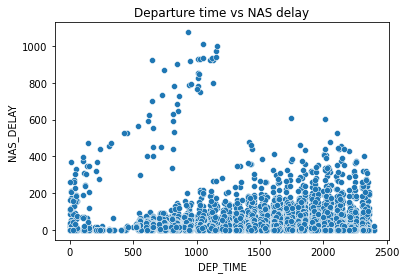

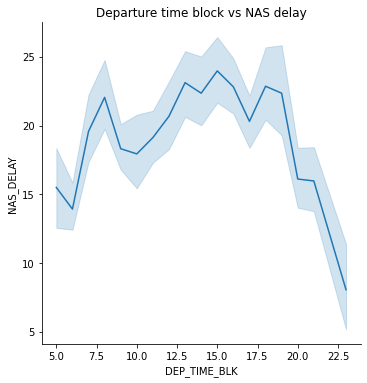

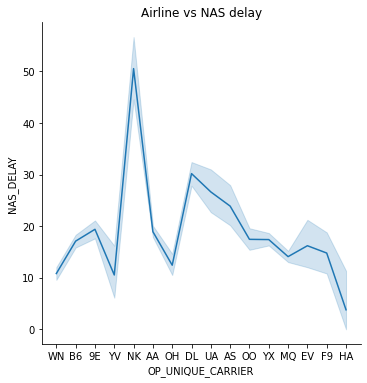

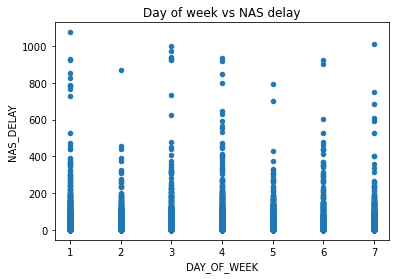

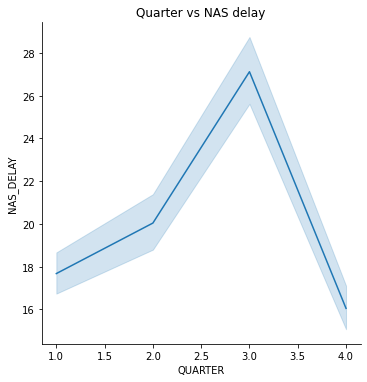

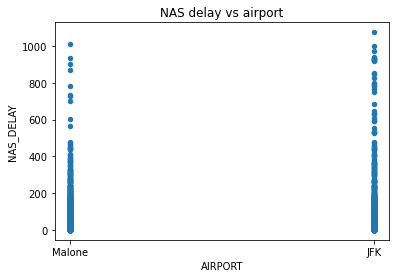

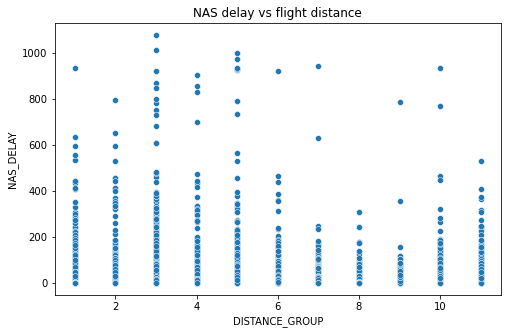

In [43]:
sb.scatterplot(data=flights, x="DEP_TIME", y="NAS_DELAY")
plt.title('Departure time vs NAS delay');

sb.relplot(x='DEP_TIME_BLK', y='NAS_DELAY',kind="line", data=flights)
plt.title('Departure time block vs NAS delay');

sb.relplot(x='OP_UNIQUE_CARRIER', y='NAS_DELAY',kind="line", data=flights)
plt.title('Airline vs NAS delay');

flights.plot.scatter(x="DAY_OF_WEEK", y="NAS_DELAY")
plt.title('Day of week vs NAS delay');

sb.relplot(x='QUARTER', y='NAS_DELAY',kind="line", data=flights)
plt.title('Quarter vs NAS delay');

flights.plot.scatter(x='AIRPORT', y='NAS_DELAY')
plt.title('NAS delay vs airport');

plt.figure(figsize=(8,5))
plt.title('NAS delay vs flight distance')
sb.scatterplot(y = "NAS_DELAY", x ='DISTANCE_GROUP' ,data=flights)


NAS delay correlates positively with dep time , however when putting departure in time blocks, it can be seen that most NAS delays happen between 7am and 7pm. The least NAS delays are at 11pm. Airlines - NK has the most NAS delays and HA has the least. Most NAS delays seem to have happened on a Thursday, in the 3rd quarter and shorter distances seem to have more NAS delays. Both airports have similar NAS delays.

# Security delay vs others

<AxesSubplot:title={'center':'Distance of flight vs security delay'}, xlabel='DISTANCE_GROUP', ylabel='SECURITY_DELAY'>

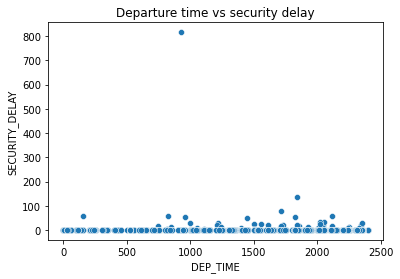

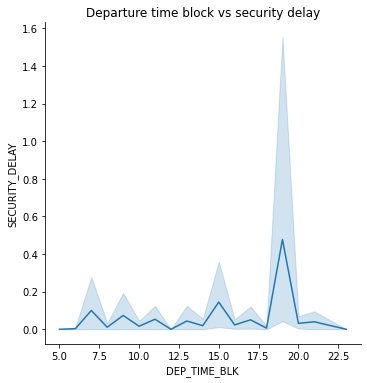

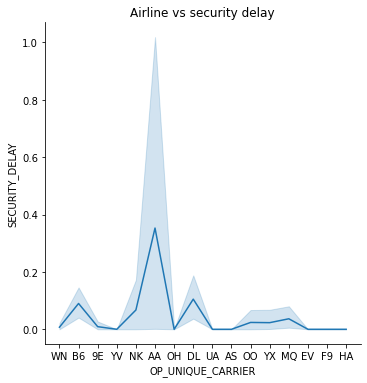

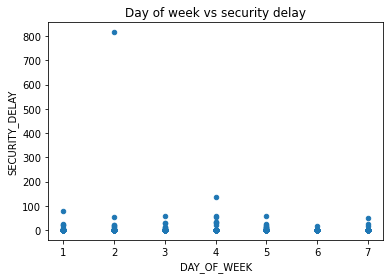

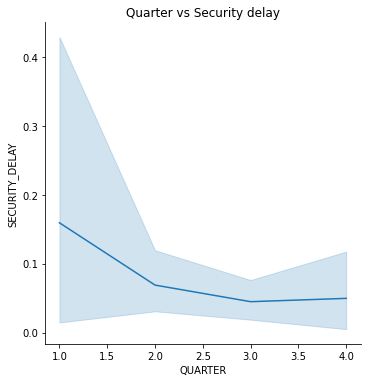

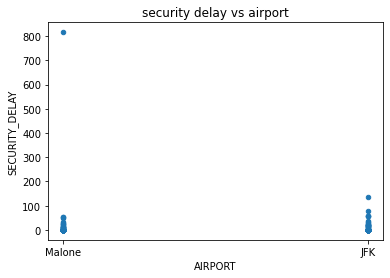

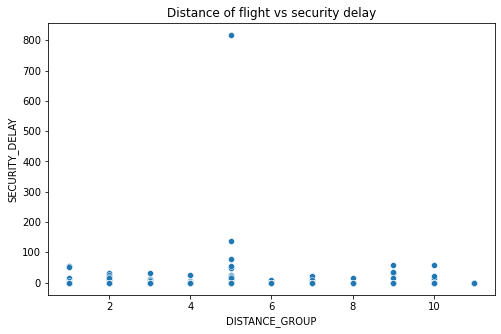

In [44]:
sb.scatterplot(data=flights, x="DEP_TIME", y="SECURITY_DELAY")
plt.title('Departure time vs security delay');

sb.relplot(x='DEP_TIME_BLK', y='SECURITY_DELAY',kind="line", data=flights)
plt.title('Departure time block vs security delay');

sb.relplot(x='OP_UNIQUE_CARRIER', y='SECURITY_DELAY', kind="line", data=flights)
plt.title('Airline vs security delay');

flights.plot.scatter(x="DAY_OF_WEEK", y="SECURITY_DELAY")
plt.title('Day of week vs security delay');

sb.relplot(x='QUARTER', y='SECURITY_DELAY',kind="line", data=flights)
plt.title('Quarter vs Security delay');

flights.plot.scatter(x='AIRPORT', y='SECURITY_DELAY')
plt.title('security delay vs airport');

plt.figure(figsize=(8,5))
plt.title('Distance of flight vs security delay')
sb.scatterplot(y = "SECURITY_DELAY", x ='DISTANCE_GROUP' ,data=flights)

Security delays - there does not seem to be a correlation between departure time and security delay. There was an outlier at around 10am at some point in the year. When putting the departure time in blocks, the most security delay was around 18:00. Airlines - AA had the most security delays. Thursday was the day with the most security delays. Security delays negatively correlates with quarters of the year, suggesting the start of the year has more. There does not seem to be a correlation between security delay and the flight distance. Malone airport (12953) seems to have less security delays than JFK (12478).

# Late aircraft delay

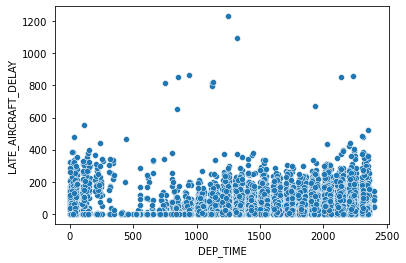

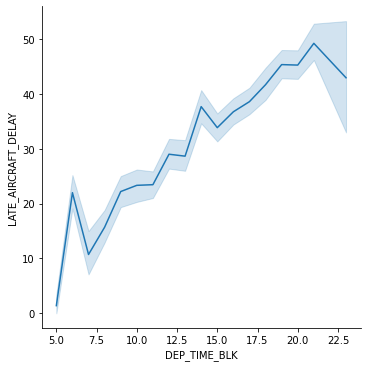

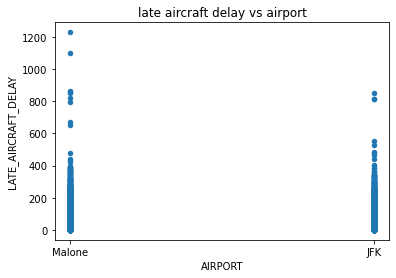

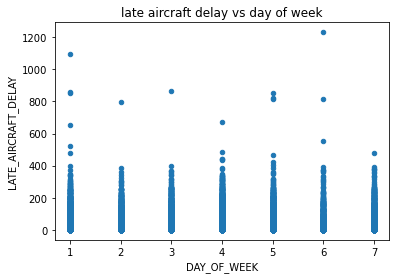

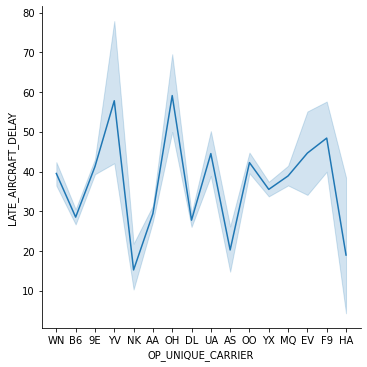

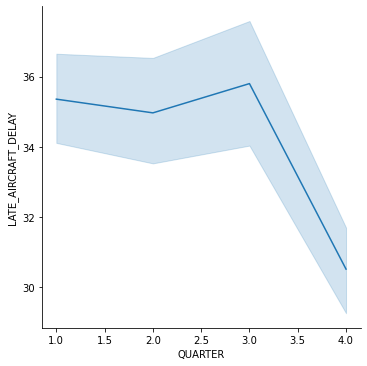

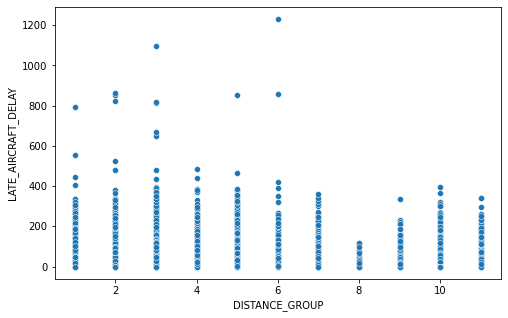

In [45]:
sb.scatterplot(data=flights, x="DEP_TIME", y="LATE_AIRCRAFT_DELAY");

sb.relplot(x='DEP_TIME_BLK', y='LATE_AIRCRAFT_DELAY',kind="line", data=flights);

flights.plot.scatter(x='AIRPORT', y='LATE_AIRCRAFT_DELAY')
plt.title('late aircraft delay vs airport');

flights.plot.scatter(x='DAY_OF_WEEK', y='LATE_AIRCRAFT_DELAY')
plt.title('late aircraft delay vs day of week');

sb.relplot(x='OP_UNIQUE_CARRIER', y='LATE_AIRCRAFT_DELAY',kind="line", data=flights)
sb.relplot(x='QUARTER', y='LATE_AIRCRAFT_DELAY',kind="line", data=flights)
plt.figure(figsize=(8,5))
sb.scatterplot(y = "LATE_AIRCRAFT_DELAY", x ='DISTANCE_GROUP' ,data=flights);

Late aircraft delay - there seems to be a positive correlation between late aircraft delay and departure time. This is shown enhanced when departure time is put into blocks. It shows there is a positive correlation as shown in the correlation table before. YV and OH airlines have the most late aircraft delays. The first 3 quarters seem to be similar but the 4th seems to have the least. The flights in the 8th distance group seem to have less late aircraft delays, several outliers in group 3 and 6. Both airports have similar late aircraft delays. Similar throughout the week.

# Weather delay

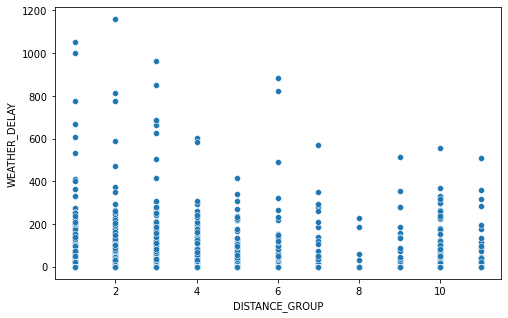

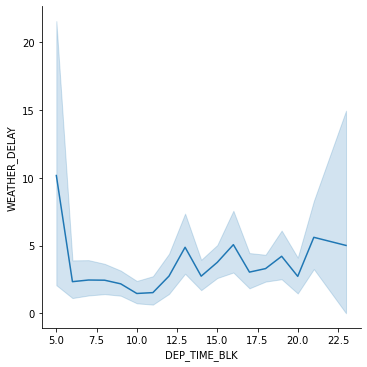

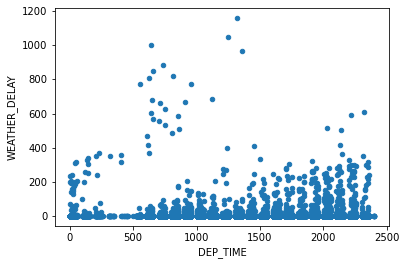

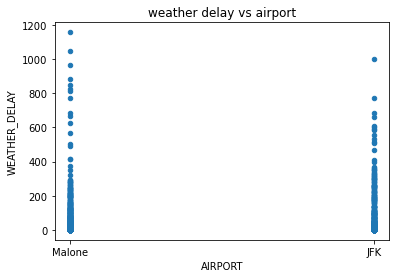

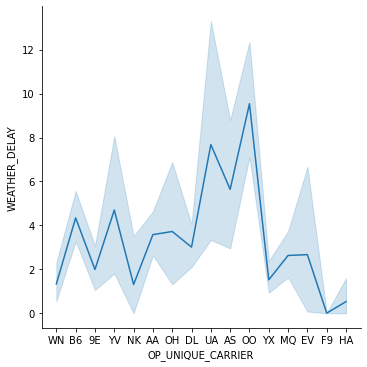

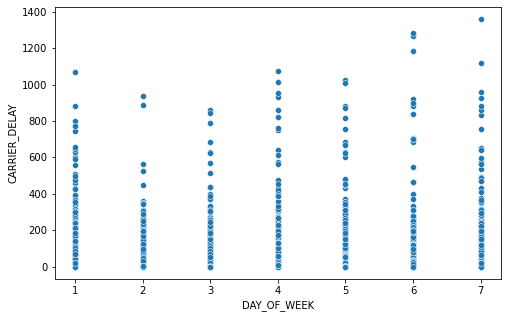

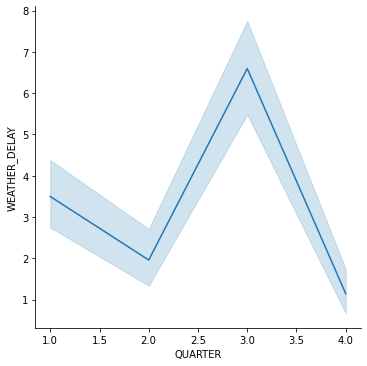

In [46]:
plt.figure(figsize=(8,5))
sb.scatterplot(x = "DISTANCE_GROUP", y ='WEATHER_DELAY' ,data=flights);

sb.relplot(x='DEP_TIME_BLK', y='WEATHER_DELAY',kind="line", data=flights);

flights.plot.scatter(x="DEP_TIME", y="WEATHER_DELAY");

flights.plot.scatter(x='AIRPORT', y='WEATHER_DELAY')
plt.title('weather delay vs airport');

sb.relplot(x='OP_UNIQUE_CARRIER', y='WEATHER_DELAY',kind="line", data=flights);

plt.figure(figsize=(8,5))
sb.scatterplot(y = "CARRIER_DELAY", x ='DAY_OF_WEEK' ,data=flights);

sb.relplot(x='QUARTER', y='WEATHER_DELAY',kind="line", data=flights);

Weather delay - similar throughout the distances, 8th group seems to have less. The most weather delays seem to have happened in the early morning and evening. OO and UA airlines had the most weather delays. Again, the 3rd quarter had the most weather delays. Malone airport seems to have more weather delays than JFK. All days are similar.

# Carrier delay

<AxesSubplot:xlabel='DAY_OF_WEEK', ylabel='CARRIER_DELAY'>

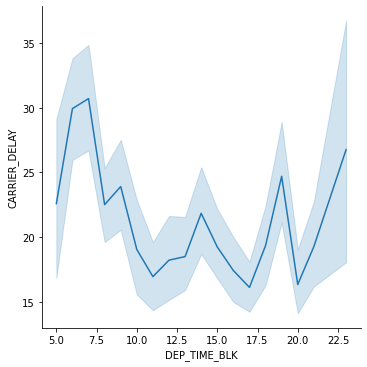

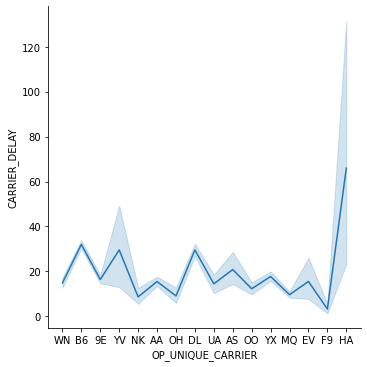

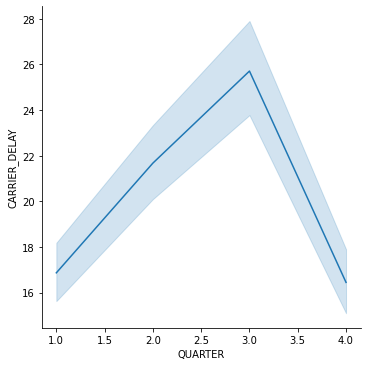

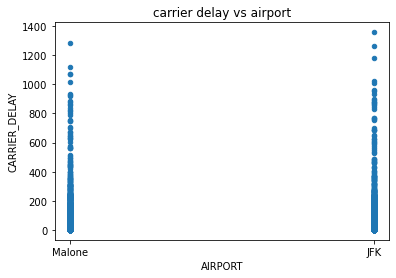

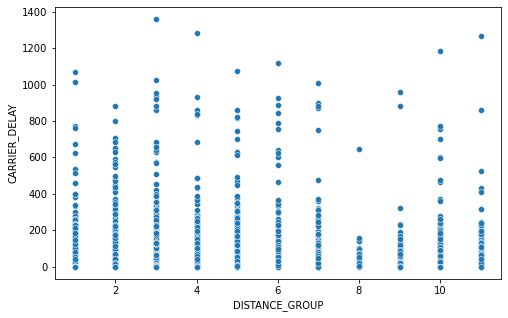

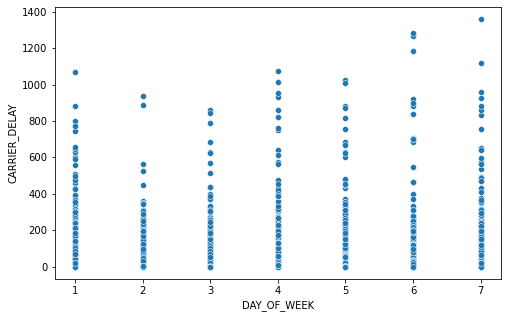

In [47]:
sb.relplot(x='DEP_TIME_BLK', y='CARRIER_DELAY',kind="line", data=flights)

sb.relplot(x='OP_UNIQUE_CARRIER', y='CARRIER_DELAY',kind="line", data=flights)

sb.relplot(x='QUARTER', y='CARRIER_DELAY',kind="line", data=flights)

flights.plot.scatter(x='AIRPORT', y='CARRIER_DELAY')
plt.title('carrier delay vs airport');

plt.figure(figsize=(8,5))
sb.scatterplot(y = "CARRIER_DELAY", x ='DISTANCE_GROUP' ,data=flights)

plt.figure(figsize=(8,5))
sb.scatterplot(y = "CARRIER_DELAY", x ='DAY_OF_WEEK' ,data=flights)

Carrier delay - most in the mornings. HA airline has the most carrier delays. 3rd quarter has the most. Airports are both similar. All days of the week are similar. Again as before, the least carrier delays happen with 8th group of distance 

In [48]:
F9 = flights['DAY_OF_WEEK'] == 1
f99 = flights[F9]

f99['DISTANCE_GROUP'].value_counts()

3     899
2     787
1     562
4     476
5     465
6     227
10    193
7     145
11    105
9      63
8      23
Name: DISTANCE_GROUP, dtype: int64

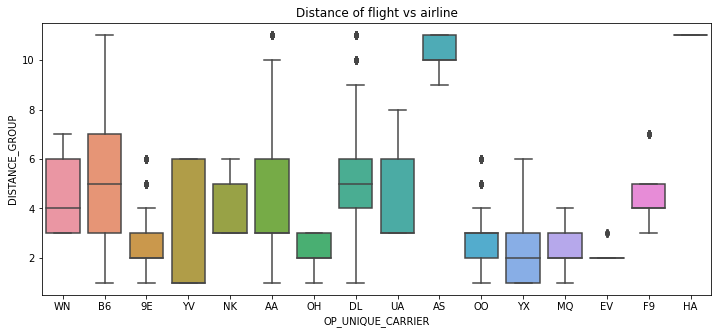

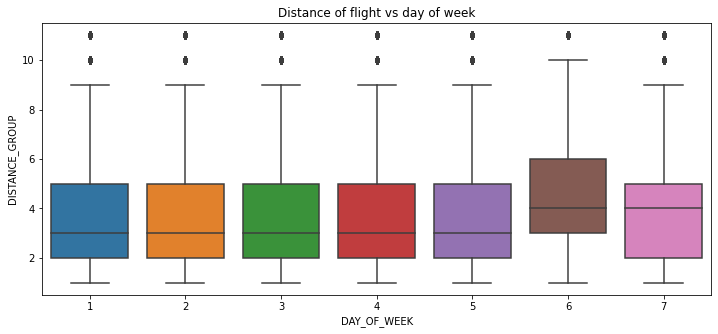

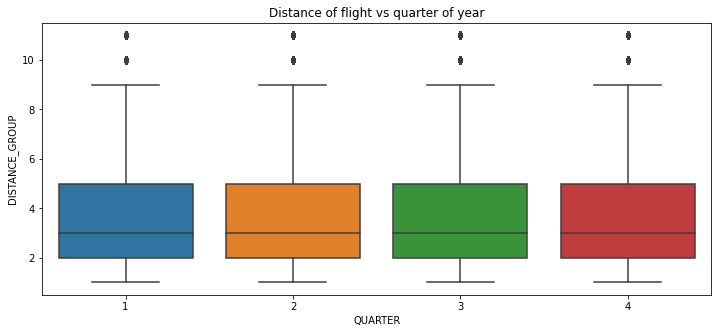

In [49]:
plt.figure(figsize=(12,5))

sb.boxplot(y = "DISTANCE_GROUP", x ='OP_UNIQUE_CARRIER' ,data=flights).set_title("Distance of flight vs airline")
;


plt.figure(figsize=(12,5))
sb.boxplot(y = "DISTANCE_GROUP", x ='DAY_OF_WEEK' ,data=flights).set_title("Distance of flight vs day of week");




plt.figure(figsize=(12,5))
sb.boxplot(y = "DISTANCE_GROUP", x ='QUARTER' ,data=flights).set_title("Distance of flight vs quarter of year");


HA only goes to one place - honolulu in group 11. No correlation with flight distance and airline. The longer flights seem to happen more a the weekend. Distance of the flights were identical throughout the year.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Original and actual departure time and delay time are positively correlated, thus evening flights were more likely to be delayed than morning ones. There seemed to be a positive correlation between departure time and Late aircraft delays as well as NAS delays, but the least NAS delays were at 11pm. Weather delays seemed to happen more in the morning and evening, and carrier delays were also more likely in the morning. Security delay did not seem to correlate with time of flight so does not need further investigation.

Overall, the 3rd quarter of the year seemed to have more delays than the others; this is July so could be the summer holidays. This was found with carrier delays,NAS delays and weather delays. I found in the univariate part that the 1st quarter had more flights than the 3rd so it is not just due to having more flights. However, security delays negatively correlated with quarters and late aircraft delays seemed similar throughout the year but increased in the 4th quarter. LOOK INTO THE 3rd


The departure time throughout the year (different quarters) did not seem to differ, with most of the airlines having their flights in the afternoon, apart from HA so this will not be looked into any further. The longer distance flights seem to happen more a the weekend. Day of the week does not make a difference to departure time, neither does distance.
 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Distance of the flight did not make a difference in whether it would be delayed or not in general as the median for all of the distances was 30 or 45 mins late; late aircraft delays, carrier delays and weather delays seemed to happen more for flights in group 8 of distance (2000 miles), however NAS delays seemed to happen more for shorter flights. There were several outliers which is expected, including distance group 4 having an outlier at group 12 for general delay. Security delay was not affected by the distance of the flight. The longer flights happened at the weekend. The days of the week did not seem to effect the delay time. Departure times of the flights throughout the year seem to be quite uniform. Distance of the flights were identical throughout the year.

There were 2 airports - JFK (12478) and Malone (12953) Malone had 64% of all flights. In general there did not seem to be much difference in delay. It seems that JFK had more weather delays, security delays but otherwise the other types of delay were quite equal. The departure times of the flights were also similar from both airports. Only weather and security delays need to be looked at. 

Overall the airlines with the most delays seem to be YV and HA. HA had the most carrier delays and the least NAS delays. YV and OH had the most late aircraft delays, NK had the most NAS delays, OO and UA had the most weather delays. It is surprising that none of the 3 airlines with the most flights were the most delayed. There was no correlation with flight distance and airline. 

There seemed to be more overall delays on Saturdays and less on Tuesdays. Weather, carrier and late carrier delays did not differ on different days, whilst NAS and security delays happened more on a Thursday. We know from the univariate data that more flights take place on a Friday than any other day.


## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

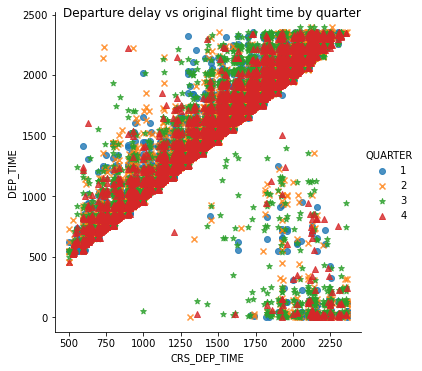

In [50]:
sb.lmplot(x='CRS_DEP_TIME', y='DEP_TIME',markers=['o', 'x', '*', '^'], hue='QUARTER', data=flights,fit_reg=False).fig.suptitle("Departure delay vs original flight time by quarter");
                        

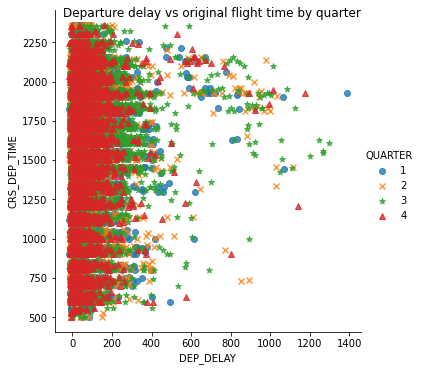

In [51]:
sb.lmplot(x='DEP_DELAY', y='CRS_DEP_TIME',markers=['o', 'x', '*', '^'], hue='QUARTER', data=flights,fit_reg=False).fig.suptitle("Departure delay vs original flight time by quarter");
                        

In [52]:
df = flights['DEP_DELAY'] >= 1350
flights[df]

,QUARTER,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,AIRPORT,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_GROUP,DEP_TIME_BLK,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
27297,1,7,2019-01-20,AA,631,JFK,"Charlotte, NC",1925,1832.0,1387.0,12.0,19,3,1358.0,0.0,20.0,0.0,29.0


I wanted to look into original departure time, actual and quarters. I can see that in the majority of cases, the 
flights took off relatively on time. There is a lump of points in the middle showing the flights that do not fit this. I then looked at delay vs original departure time vs quarter. There seems to be a flight that was delayed by around 1350 minutes, I looked into this and the data seems correct!  

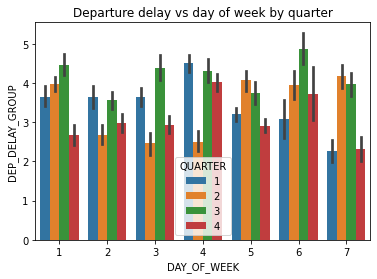

In [53]:
sb.barplot(y='DEP_DELAY_GROUP', x='DAY_OF_WEEK', hue='QUARTER', data=flights).set_title("Departure delay vs day of week by quarter");

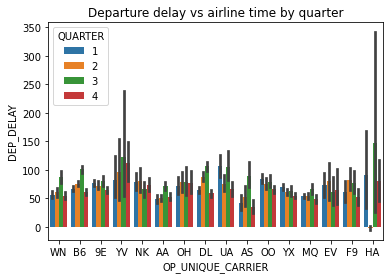

In [54]:
sb.barplot(x='OP_UNIQUE_CARRIER', y='DEP_DELAY', hue='QUARTER', data=flights, saturation=0.8).set_title("Departure delay vs airline time by quarter");

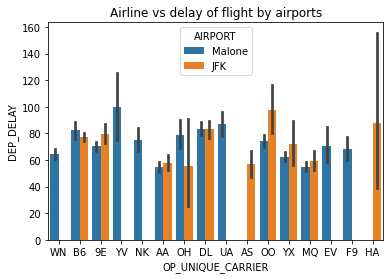

In [55]:
sb.barplot(x='OP_UNIQUE_CARRIER', y='DEP_DELAY', hue='AIRPORT', data=flights, saturation=0.8).set_title("Airline vs delay of flight by airports");


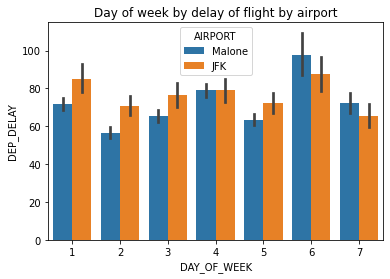

In [56]:
sb.barplot(x='DAY_OF_WEEK', y='DEP_DELAY', hue='AIRPORT', data=flights, saturation=0.8).set_title("Day of week by delay of flight by airport");

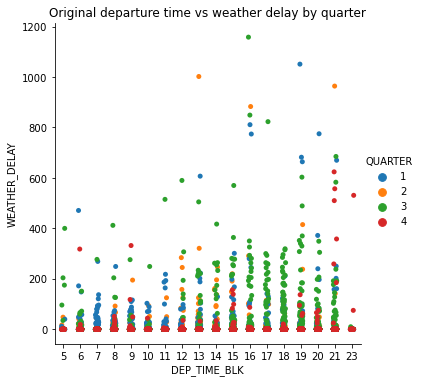

In [57]:
sb.catplot(x='DEP_TIME_BLK', y='WEATHER_DELAY', hue='QUARTER', data=flights)
plt.title("Original departure time vs weather delay by quarter");

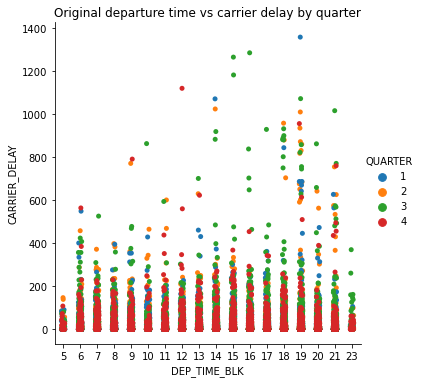

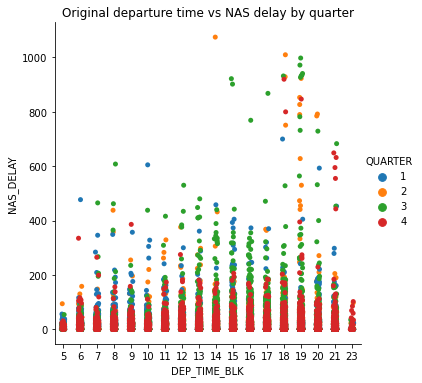

In [58]:
sb.catplot(x='DEP_TIME_BLK', y='CARRIER_DELAY', hue='QUARTER', data=flights)
plt.title("Original departure time vs carrier delay by quarter");
sb.catplot(x='DEP_TIME_BLK', y='NAS_DELAY', hue='QUARTER', data=flights)
plt.title("Original departure time vs NAS delay by quarter");


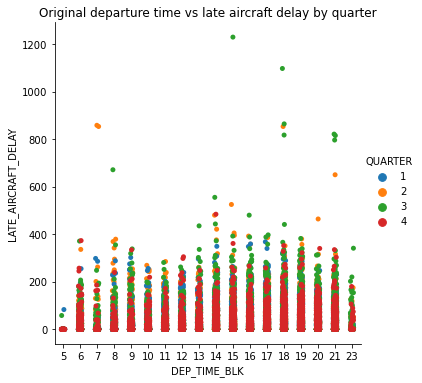

In [59]:
sb.catplot(x='DEP_TIME_BLK', y='LATE_AIRCRAFT_DELAY', hue='QUARTER', data=flights)
plt.title("Original departure time vs late aircraft delay by quarter");

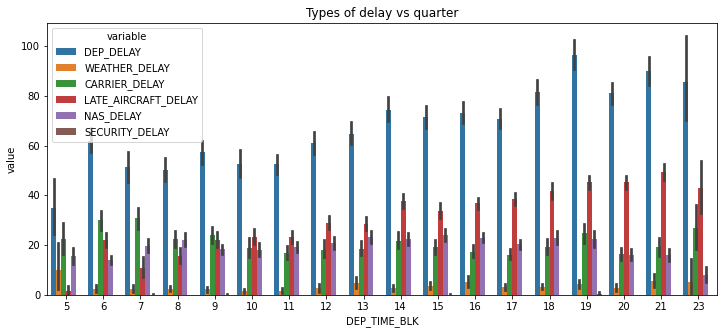

In [86]:
plt.figure(figsize=(12,5))
df_melted = flights.reset_index().melt(id_vars='DEP_TIME_BLK', value_vars=['DEP_DELAY','WEATHER_DELAY', 'CARRIER_DELAY', 'LATE_AIRCRAFT_DELAY', 'NAS_DELAY','SECURITY_DELAY' ])
sb.barplot(data=df_melted, x='DEP_TIME_BLK', y='value', hue='variable')

plt.title("Types of delay vs quarter");

In [ ]:
plt.figure()
df_melted = flights.reset_index().melt(id_vars='QUARTER', value_vars=['DEP_DELAY','WEATHER_DELAY', 'CARRIER_DELAY', 'LATE_AIRCRAFT_DELAY', 'NAS_DELAY','SECURITY_DELAY' ])
sb.barplot(data=df_melted, x='QUARTER', y='value', hue='variable')
plt.xlabel('QUARTER')
plt.ylabel('Delay time (mins)')
plt.title("Types of delay vs quarter");


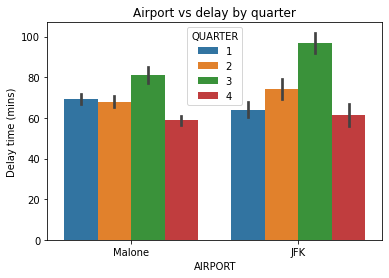

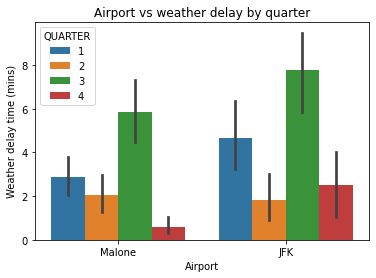

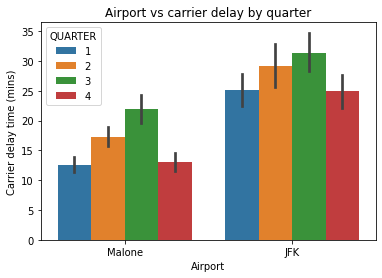

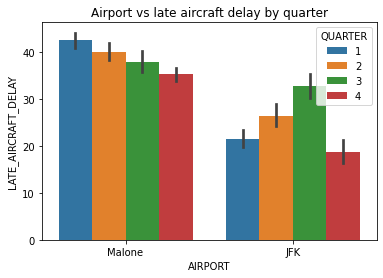

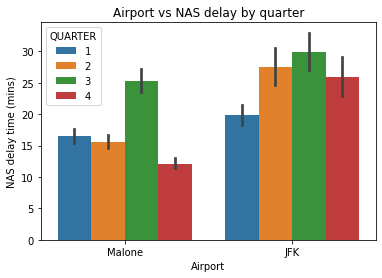

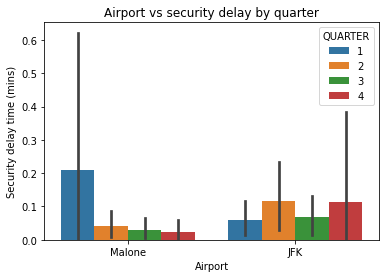

In [88]:
plt.figure()
sb.barplot(x='AIRPORT', y='DEP_DELAY', hue='QUARTER', data=flights)
plt.xlabel('AIRPORT')
plt.ylabel('Delay time (mins)')
plt.title("Airport vs delay by quarter");

plt.figure()
sb.barplot(x='AIRPORT', y='WEATHER_DELAY', hue='QUARTER', data=flights)
plt.title("Airport vs weather delay by quarter")
plt.xlabel('Airport')
plt.ylabel('Weather delay time (mins)');

plt.figure()
sb.barplot(x='AIRPORT', y='CARRIER_DELAY', hue='QUARTER', data=flights)
plt.title("Airport vs carrier delay by quarter")
plt.xlabel('Airport')
plt.ylabel('Carrier delay time (mins)');

plt.figure()
sb.barplot(x='AIRPORT', y='LATE_AIRCRAFT_DELAY', hue='QUARTER', data=flights)
plt.title("Airport vs late aircraft delay by quarter");

plt.figure()
sb.barplot(x='AIRPORT', y='NAS_DELAY', hue='QUARTER', data=flights)
plt.title("Airport vs NAS delay by quarter")
plt.xlabel('Airport')
plt.ylabel('NAS delay time (mins)');

plt.figure()
sb.barplot(x='AIRPORT', y='SECURITY_DELAY', hue='QUARTER', data=flights)
plt.title("Airport vs security delay by quarter")
plt.xlabel('Airport')
plt.ylabel('Security delay time (mins)');

<Figure size 432x288 with 0 Axes>

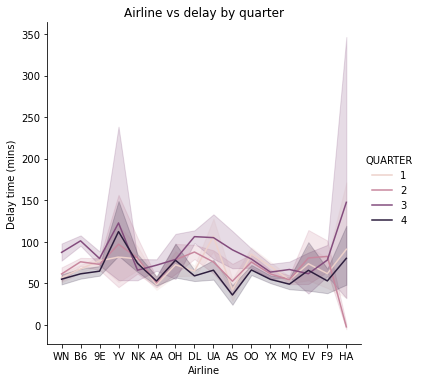

<Figure size 432x288 with 0 Axes>

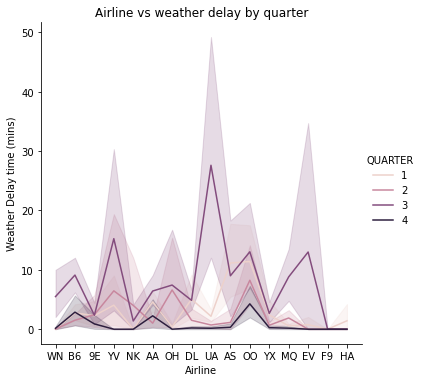

<Figure size 432x288 with 0 Axes>

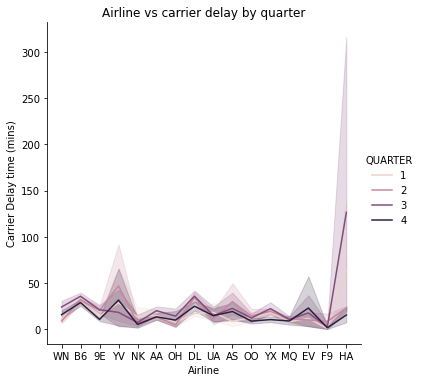

<Figure size 432x288 with 0 Axes>

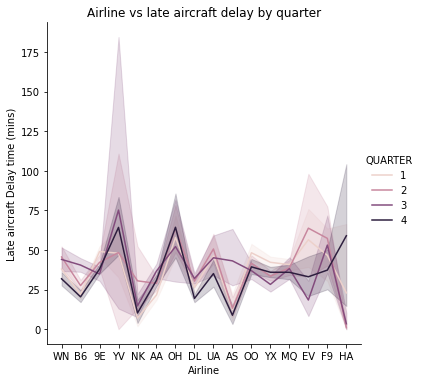

<Figure size 432x288 with 0 Axes>

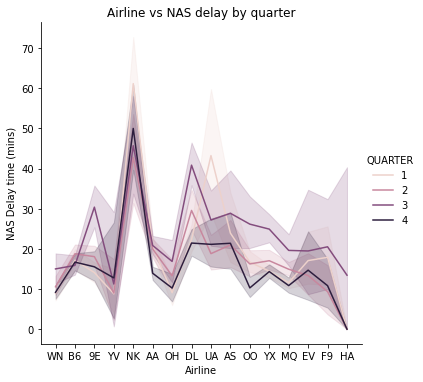

In [89]:
plt.figure()
sb.relplot(x='OP_UNIQUE_CARRIER', y='DEP_DELAY', hue='QUARTER',kind="line", data=flights)
plt.title("Airline vs delay by quarter")
plt.xlabel('Airline')
plt.ylabel('Delay time (mins)');

plt.figure()
sb.relplot(x='OP_UNIQUE_CARRIER', y='WEATHER_DELAY', hue='QUARTER',kind="line", data=flights)
plt.title("Airline vs weather delay by quarter")
plt.xlabel('Airline')
plt.ylabel('Weather Delay time (mins)');

plt.figure()
sb.relplot(x='OP_UNIQUE_CARRIER', y='CARRIER_DELAY', hue='QUARTER',kind="line", data=flights)
plt.title("Airline vs carrier delay by quarter")
plt.xlabel('Airline')
plt.ylabel('Carrier Delay time (mins)');

plt.figure()
sb.relplot(x='OP_UNIQUE_CARRIER', y='LATE_AIRCRAFT_DELAY', hue='QUARTER',kind="line", data=flights)
plt.title("Airline vs late aircraft delay by quarter")
plt.xlabel('Airline')
plt.ylabel('Late aircraft Delay time (mins)');

plt.figure()
sb.relplot(x='OP_UNIQUE_CARRIER', y='NAS_DELAY', hue='QUARTER',kind="line", data=flights)
plt.title("Airline vs NAS delay by quarter")
plt.xlabel('Airline')
plt.ylabel('NAS Delay time (mins)');


<Figure size 432x288 with 0 Axes>

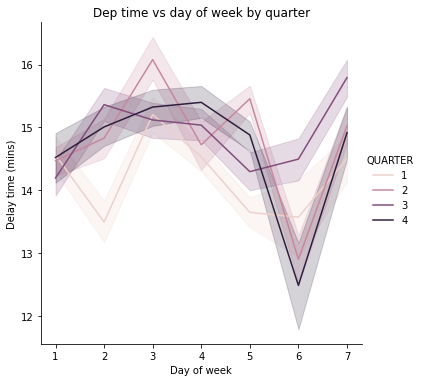

<Figure size 432x288 with 0 Axes>

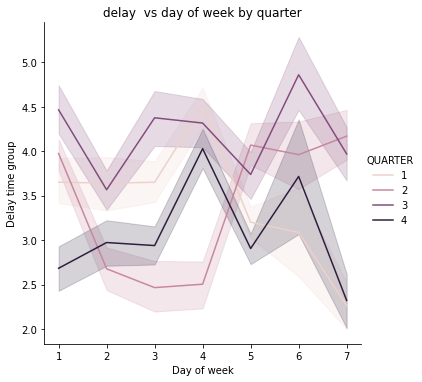

<Figure size 432x288 with 0 Axes>

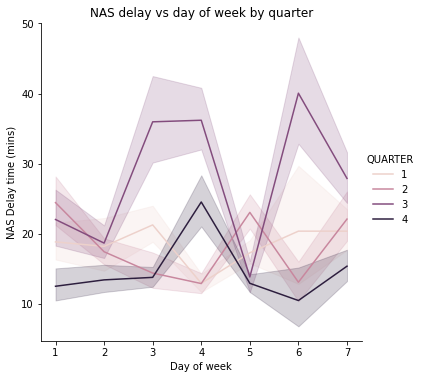

<Figure size 432x288 with 0 Axes>

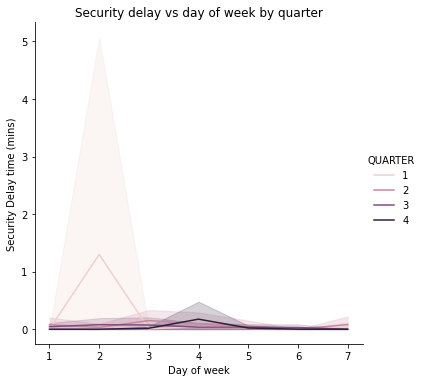

In [90]:
plt.figure()
sb.relplot(y='DEP_TIME_BLK', x='DAY_OF_WEEK', hue='QUARTER',kind="line", data=flights)
plt.title("Dep time vs day of week by quarter")
plt.xlabel('Day of week')
plt.ylabel('Delay time (mins)');

plt.figure()
sb.relplot(y='DEP_DELAY_GROUP', x='DAY_OF_WEEK', hue='QUARTER',kind="line", data=flights)
plt.title("delay  vs day of week by quarter")
plt.xlabel('Day of week')
plt.ylabel('Delay time group');

plt.figure()
sb.relplot(y='NAS_DELAY', x='DAY_OF_WEEK', hue='QUARTER',kind="line", data=flights)
plt.title("NAS delay vs day of week by quarter")
plt.xlabel('Day of week')
plt.ylabel('NAS Delay time (mins)');

plt.figure()
sb.relplot(y='SECURITY_DELAY', x='DAY_OF_WEEK', hue='QUARTER',kind="line", data=flights)
plt.title("Security delay vs day of week by quarter")
plt.xlabel('Day of week')
plt.ylabel('Security Delay time (mins)');


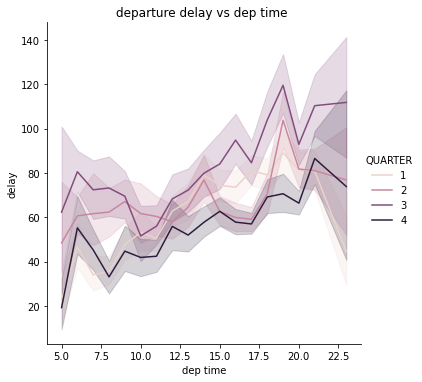

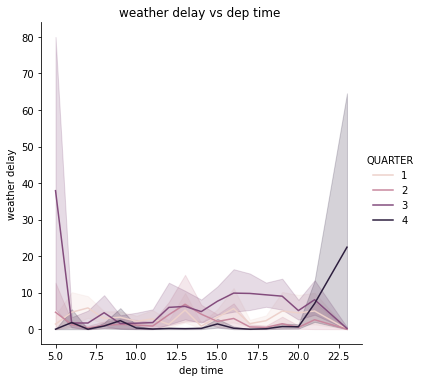

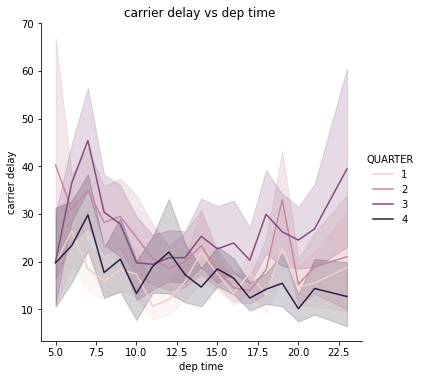

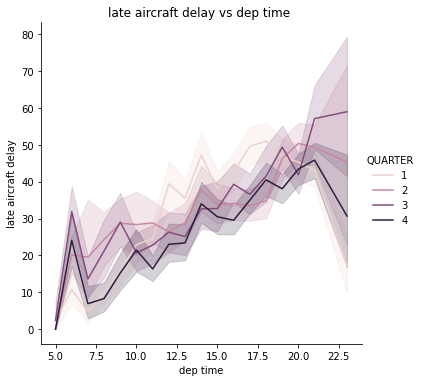

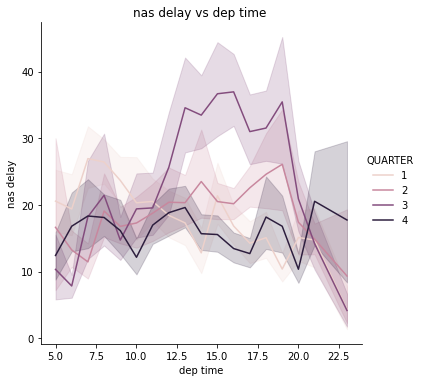

In [91]:
sb.relplot(x='DEP_TIME_BLK', y='DEP_DELAY', hue='QUARTER',kind="line", data=flights)
plt.title('departure delay vs dep time ')
plt.xlabel('dep time')
plt.ylabel('delay');


sb.relplot(x='DEP_TIME_BLK', y='WEATHER_DELAY', hue='QUARTER',kind="line", data=flights)
plt.title('weather delay vs dep time ')
plt.xlabel('dep time')
plt.ylabel('weather delay');

sb.relplot(x='DEP_TIME_BLK', y='CARRIER_DELAY', hue='QUARTER',kind="line", data=flights)
plt.title('carrier delay vs dep time ')
plt.xlabel('dep time')
plt.ylabel('carrier delay');

sb.relplot(x='DEP_TIME_BLK', y='LATE_AIRCRAFT_DELAY', hue='QUARTER',kind="line", data=flights)
plt.title('late aircraft delay vs dep time ')
plt.xlabel('dep time')
plt.ylabel('late aircraft delay');

sb.relplot(x='DEP_TIME_BLK', y='NAS_DELAY', hue='QUARTER',kind="line", data=flights)
plt.title('nas delay vs dep time ')
plt.xlabel('dep time')
plt.ylabel('nas delay');



Overall, the 3rd quarter of the year seemed to have more delays than the others; this is July so could be the summer holidays. This was found with carrier delays,NAS delays and weather delays. I found in the univariate part that the 1st quarter had more flights than the 3rd so it is not just due to having more flights. However, security delays negatively correlated with quarters and late aircraft delays seemed similar throughout the year but increased in the 4th quarter. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I wanted to look at the data I found in more depth. Delay and original time was positively correlated which was found before.Therefore I looked at delay group, day of week and quarters. I found that the 3rd quarter had more delays on a Saturday and less on a Tuesday, this strengthens what I found in the bivariate. The 1st and 4th quarter has lowest delays on a Sunday and highest on a Thursday. 

Looking at airlines, delay and quarter. The 3rd quarter had the most general, weather, carrier and NAS delays, the lowest being in the 4th quarter. Results strengthened what I found before. YV had the highest delays overall of all 4 quarters, this was also seen when looking at weather delay in the 3rd quarter. OO had the most weather delays in the other quarters. In all quarters, carrier delay and NAS delay seemed to be equal. The late aircraft delay was higher and equal in all quarters slightly less in the 4th. Security delay is negligible. This solidifys that more delays happened in the 3rd quarter.

The error bar of HA was the biggest in the 3rd quarter (and this is when HA had the most carrier delays), but HA did not fly in the second quarter. YV only flew from Malone and had the most delays, whilst HA only flew from JFK. The airline with the most delays from JFK was OO. 

As before, I found that NK had the highest NAS delays and HA had the lowest. The 4th quarter had the least delays ad 3rd had  the highest.

Overall, Saturday had the most delays with the highest quarter being 3rd and the lowest quarter was 2nd. The least delays seemed to happen midweek. For both airports, Saturday seemed to have the most delays. For Malone, Tuesday was the lowest and JFK, Sunday was the lowest. 

I found before that NAS was highest on a Thursday and this was found again in the 4th quarter but not in the 3rd. Security delay seemed to happen in the 1st quarter more on a Tuesday and on a Thursday in the other quarters. There was not much difference otherwise. I did not look at the other types of delay due to not finding a difference before. 

The least amount of flights seem to take off on a Saturday and in the 4th quarter. The most flights took off on a Wed in the 2nd quarter.

Again, it was found that weather delay happened more in the morning and evening throughout the year. The least weather delays happened in the 4th quarter and the most in the 3rd. All 4 quarters had a positive correlation between weather delay and dep time. With carrier delay, the 3rd quarter was the highest and the 4th was the lowest. Security, same trend throughout the quarters. Late aircraft, 3rd and 4th quarter seemed to have the most delays with similar trends.

Overall, JFK had more weather, carrier and NAS delays than Malone, the 3rd quarter was the highest for all 3 types and the 2nd was the lowest for weather, but 1st was lower for NAS and carrier delays. For Malone, the 3rd quarter had the most delays in all 3 types and the 4th had the lowest weather delays, but the 1st quarter had the least carrier and NAS delays. 

Malone had more security and late aircraft delays, both having more in the 4th quarter and least in the 1st. JFk had most late aircrafts in the 3rd quarter but most security delays in the 2nd. There were least late aircrafts in the 4th but lease secuirty delays in the 1st. 


### Were there any interesting or surprising interactions between features?

Less flights took off from JFK but there were still more weather, carrier and late aircrafts from there. 

It surprised me that the least flights took off on a Saturday and in the 4th quarter and the most took off in the 2nd quarter on a Wed. 

The 3rd quarter seems to have the most delays overall as found before but not the highest amount of flights.


